In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import data_prep
import data_exploration

In [2]:
font = {'family' : 'serif',
        'size'   : 15}

plt.rc('font', **font)
plt.rc('lines', linewidth=3)
plt.rc('axes', linewidth=3)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)

In [3]:
machine_name = 'Polaris'

In [4]:
df_full = data_prep.load_parse_engineered_df(machine_name)
df_full.head()

,JOB_NAME,COBALT_JOBID,MACHINE_NAME,QUEUED_TIMESTAMP,QUEUED_DATE_ID,START_TIMESTAMP,START_DATE_ID,END_TIMESTAMP,END_DATE_ID,USERNAME_GENID,...,DAY_NAME,HOUR,RUNTIME_HOURS,WALLTIME_HOURS,QUEUED_WAIT_HOURS,ELIGIBLE_WAIT_HOURS,JOBS_RUNNING,JOBS_QUEUED,IS_WEEKEND,IS_NIGHT
2,314423.polaris,0,polaris,2022-07-31 21:20:58,20220731,2022-07-31 21:20:58,20220731,2022-08-01 03:22:41,20220801,1.844480e+13,...,Sunday,21,6.028611,6.0,0.000000,0.0,3,-2,True,False
0,314424.polaris,0,polaris,2022-08-01 01:04:53,20220801,2022-08-01 01:04:53,20220801,2022-08-01 01:36:01,20220801,3.086128e+13,...,Monday,1,0.518889,0.5,0.000000,0.0,4,-2,False,True
11,314425.polaris,0,polaris,2022-08-01 01:15:09,20220801,2022-08-01 01:15:09,20220801,2022-08-01 13:16:24,20220801,8.252524e+13,...,Monday,1,12.020833,12.0,0.000000,0.0,5,-2,False,True
1,314426.polaris,0,polaris,2022-08-01 02:21:34,20220801,2022-08-01 02:21:35,20220801,2022-08-01 02:52:28,20220801,3.086128e+13,...,Monday,2,0.514722,0.5,0.000278,0.0,4,-1,False,True
7,314427.polaris,0,polaris,2022-08-01 02:33:21,20220801,2022-08-01 02:33:22,20220801,2022-08-01 04:33:54,20220801,9.198275e+13,...,Monday,2,2.008889,2.0,0.000278,0.0,5,-1,False,True


In [5]:
df_full.columns

Index(['JOB_NAME', 'COBALT_JOBID', 'MACHINE_NAME', 'QUEUED_TIMESTAMP',
       'QUEUED_DATE_ID', 'START_TIMESTAMP', 'START_DATE_ID', 'END_TIMESTAMP',
       'END_DATE_ID', 'USERNAME_GENID', 'PROJECT_NAME_GENID', 'QUEUE_NAME',
       'WALLTIME_SECONDS', 'RUNTIME_SECONDS', 'NODES_USED', 'NODES_REQUESTED',
       'CORES_USED', 'CORES_REQUESTED', 'LOCATION', 'EXIT_STATUS',
       'ELIGIBLE_WAIT_SECONDS', 'ELIGIBLE_WAIT_FACTOR', 'QUEUED_WAIT_SECONDS',
       'QUEUED_WAIT_FACTOR', 'REQUESTED_CORE_HOURS', 'USED_CORE_HOURS',
       'CAPABILITY_USAGE_CORE_HOURS', 'NONCAPABILITY_USAGE_CORE_HOURS',
       'BUCKETS3_A_USAGE_CORE_HOURS', 'BUCKETS3_B_USAGE_CORE_HOURS',
       'BUCKETS3_C_USAGE_CORE_HOURS', 'MACHINE_PARTITION', 'EXIT_CODE', 'MODE',
       'RESID', 'DATA_LOAD_STATUS', 'CAPABILITY', 'SIZE_BUCKETS3',
       'PERCENTILE', 'NUM_TASKS_SUBBLOCK', 'NUM_TASKS_CONSECUTIVE',
       'NUM_TASKS_MULTILOCATION', 'NUM_TASKS_SINGLE', 'COBALT_NUM_TASKS',
       'IS_SINGLE', 'IS_CONSECUTIVE', 'IS_MULTIL

# Data Filtering for Prediction

In [7]:
print(df_full.shape)
df_filtered = df_full[df_full['ELIGIBLE_WAIT_HOURS'] != 0]
print(df_filtered.shape)

#Focus on the main queues for modelling, remove reservation and special queues
df_filtered=df_filtered.apply(lambda row: row[df_filtered['QUEUE_NAME'].isin(['small','medium','large', 
                                  'backfill-small',
                                'backfill-medium', 'backfill-large','debug' ])])       
print(df_filtered.shape)
print(df_filtered['QUEUE_NAME'].unique())

(502936, 71)
(300363, 71)
(174241, 71)
['large' 'backfill-small' 'small' 'debug' 'medium' 'backfill-large'
 'backfill-medium']


# Encode Categorical Columns and Remove Others

In [9]:
df = data_prep.subset_columns_training(df_filtered)
print(df.shape)

df_encoded = data_prep.encode_categorical_variables(df)
print(df_encoded.shape)

(174241, 24)
(174241, 24)
(174241, 24)
(174241, 24)


In [10]:
print(df_encoded['ELIGIBLE_WAIT_HOURS'].describe())

count    174241.000000
mean          7.514880
std          31.153473
min           0.000278
25%           0.002222
50%           0.003611
75%           1.137222
max        1154.972778
Name: ELIGIBLE_WAIT_HOURS, dtype: float64


# Split into train, testing and eval set

In [12]:
train_set, test_set, eval_set, X_train, y_train, X_test, y_test, X_eval, y_eval = data_prep.split_dataset(df_encoded)


Train set: 104544
Test set: 34848
Eval set: 34849
X_train shape: (104544, 23), y_train shape: (104544,)
X_test shape: (34848, 23), y_test shape: (34848,)
X_eval shape: (34849, 23), y_eval shape: (34849,)


# Remove Outliers

(102857, 23)
(102857,)


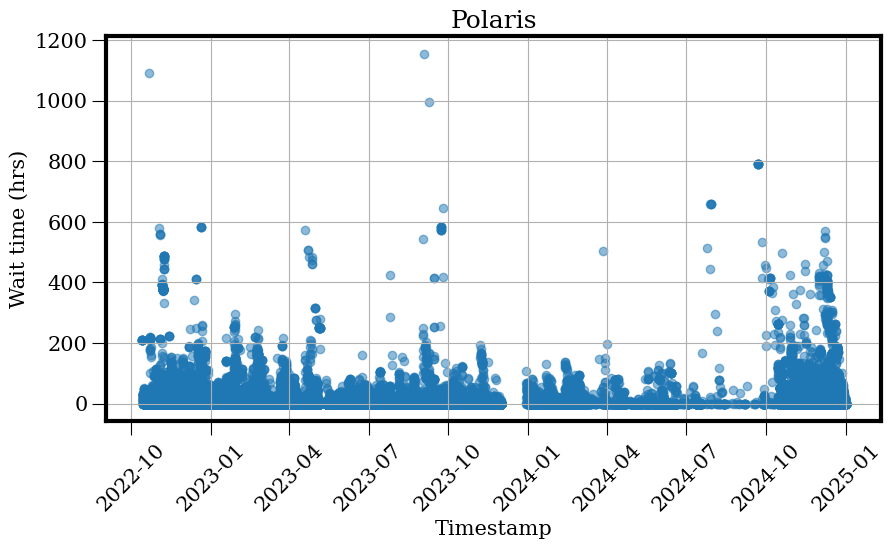

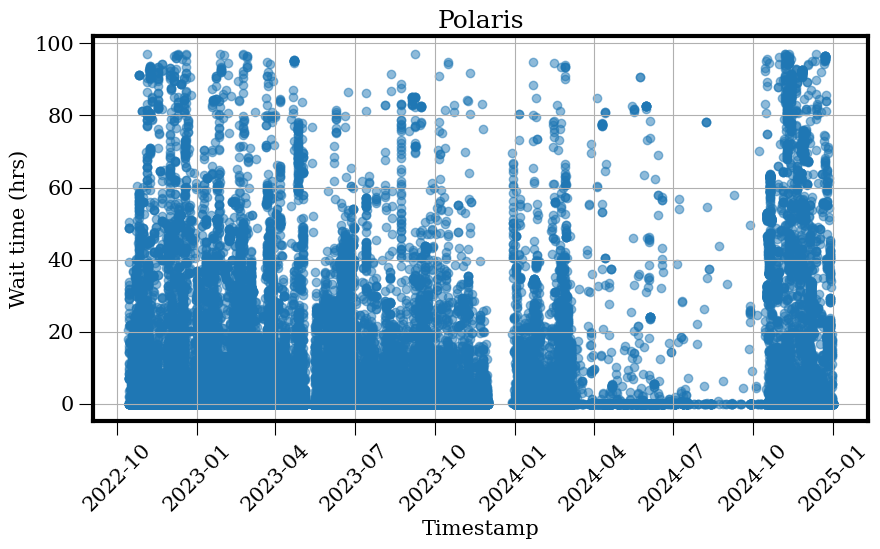

(102857,)


In [14]:
X_train_without_outliers, y_train_without_outliers = data_prep.outlier_removal(X_train, y_train, machine_name)

# Remove Timestamp

In [16]:
# not float/int so challenging for later 
X_train=data_prep.remove_timestamp(X_train)
X_train_without_outliers=data_prep.remove_timestamp(X_train_without_outliers)
X_test=data_prep.remove_timestamp(X_test)
X_eval=data_prep.remove_timestamp(X_eval)

# Checking Correlations on Training Data (without Outliers)

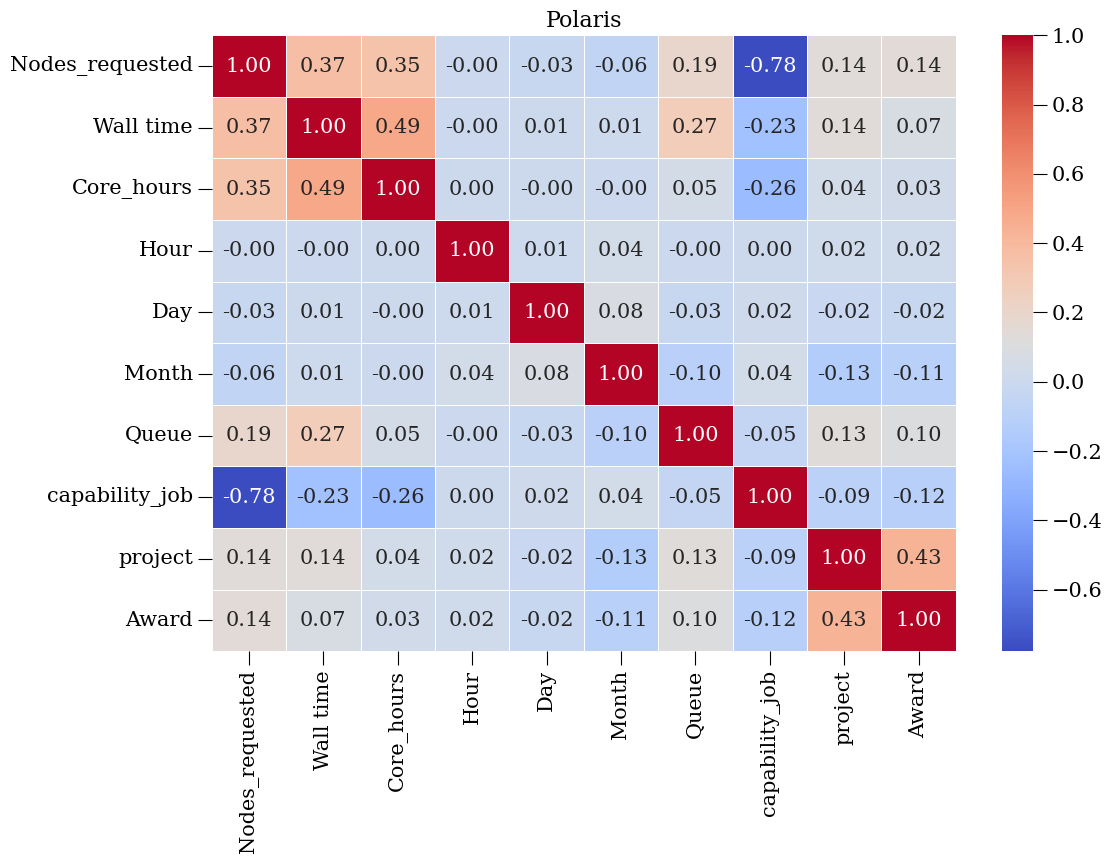

In [18]:
data_exploration.plot_correlations(X_train_without_outliers, machine_name)

# Feature Selection

In [20]:
#Data Standardization; Standardize features
X_train_without_outliers_rescaled, X_test_rescaled, X_eval_rescaled = data_prep.rescale_data(X_train_without_outliers, X_test, X_eval)

X_test size:(34848, 22)
X_test_rescaled size:(34848, 22)
X_eval_rescaled size:(34849, 22)


(102857, 22)
(34848, 22)
Cummulative variance (percent:)/n/t[ 23.76632206  39.04948153  48.72691214  56.00078149  62.38125561
  68.45351921  73.79942986  78.77104906  83.50102087  87.74301401
  90.63980528  93.16165446  95.41233774  96.96406456  98.36860157
  99.33309565  99.99858726 100.         100.         100.
 100.         100.        ]
(102857, 19)
(34848, 19)
(34849, 19)


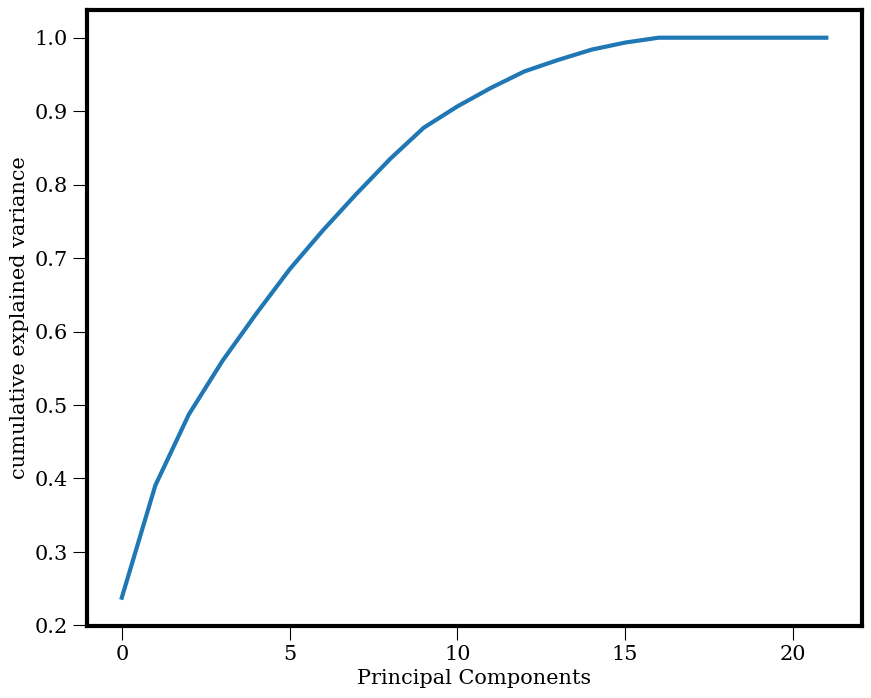

In [21]:
# save column names for future use
feature_names =X_train_without_outliers.columns 

# Use PCA + clustering to select subset of features 
X_train_reduced, X_test_reduced, X_eval_reduced, selected_features = data_prep.feature_selection(X_train_without_outliers_rescaled, 
                                                                                 X_test_rescaled, X_eval_rescaled,feature_names)



In [22]:
y_train_log, y_eval_log, y_test_log=data_prep.rescale_target(y_train, y_eval, y_test, machine_name)
print(y_train_log.shape)
print(y_eval_log.shape)
print(y_test_log.shape)

(104544,)
(34849,)
(34848,)


In [23]:
X_train_class_reduced, y_train_class_reduced, X_test_class_reduced, y_test_class_reduced, X_eval_class_reduced, y_eval_class_reduced,X_train_class, y_train_class, X_test_class, y_test_class,X_eval_class, y_eval_class = data_prep.process_wait_time_range(train_set, test_set, eval_set, selected_features)


WAIT_TIME_RANGE
0    26034
1      939
2     1117
3      763
4      628
5      559
6      493
7     1584
8     2731
Name: count, dtype: int64
Index(['ELIGIBLE_WAIT_HOURS', 'QUEUED_TIMESTAMP', 'QUEUED_DATE_ID',
       'NODES_REQUESTED', 'CORES_REQUESTED', 'WALLTIME_HOURS',
       'REQUESTED_CORE_HOURS', 'HOUR', 'DAY', 'MONTH', 'YEAR',
       'COBALT_NUM_TASKS', 'IS_SINGLE', 'JOBS_QUEUED', 'JOBS_RUNNING',
       'IS_WEEKEND', 'IS_NIGHT', 'QUEUE_NAME_ENC', 'CAPABILITY_ENC',
       'PROJECT_NAME_GENID_ENC', 'ALLOCATION_AWARD_CATEGORY_ENC',
       'DAY_NAME_ENC', 'MODE_ENC', 'USERNAME_GENID_ENC', 'WAIT_TIME_RANGE'],
      dtype='object')
WAIT_TIME_RANGE
0    74.707300
1     2.694559
2     3.205349
3     2.189509
4     1.802112
5     1.604109
6     1.414715
7     4.545455
8     7.836892
Name: proportion, dtype: float64
Index(['QUEUED_DATE_ID', 'NODES_REQUESTED', 'CORES_REQUESTED',
       'WALLTIME_HOURS', 'REQUESTED_CORE_HOURS', 'HOUR', 'DAY', 'MONTH',
       'YEAR', 'COBALT_NUM_TASKS', 'IS_S

In [24]:
# save final data for training/testing
data_prep.save_final_data(X_train, y_train, X_test, y_test, X_eval, y_eval, y_train_log, y_eval_log, y_test_log, y_train_without_outliers, X_train_without_outliers, X_train_reduced, X_test_reduced, X_eval_reduced, X_train_class, y_train_class,X_test_class,y_test_class, X_eval_class, y_eval_class, X_train_class_reduced, y_train_class_reduced, X_test_class_reduced, y_test_class_reduced, X_eval_class_reduced, y_eval_class_reduced, machine_name)

(104544,)


In [25]:
X_train_class_reduced.shape

(104544, 19)

In [26]:
X_train_class.shape

(104544, 22)

In [27]:
y_train_log.shape

(104544,)

In [28]:
X_train.shape

(104544, 22)